> Họ và tên: **Bùi Đình Bảo**
> 
> MSSV: **21120201**
> 
> *Lab cá nhân 1 - Môn: Trực quan hóa dữ liệu*

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PCA áp dụng cho bộ dữ liệu điểm số đơn giản:

| Math | Physics |
|------|---------|
|   8  |    10   |
|   6  |    7    |
|   4  |    2    |
|   5  |    5    |
|   9  |    7    |
|   5  |    2    |
|   0  |    1    |
|   3  |    6    |
|   7  |    8    |
|   1  |    4    |


In [2]:
# Step 1: Standardize the data
data = np.array([
    [8, 6, 4, 5, 9, 5, 0, 3, 7, 1],
    [10, 7, 2, 5, 7, 2, 1, 6, 8, 4]
])
mean = np.mean(data, axis=1)
std = np.std(data, axis=1)
display(mean, std)

data_standardized = (data - mean[:, None]) #/ std[:, None]
data_standardized

array([4.8, 5.2])

array([2.74954542, 2.78567766])

array([[ 3.2,  1.2, -0.8,  0.2,  4.2,  0.2, -4.8, -1.8,  2.2, -3.8],
       [ 4.8,  1.8, -3.2, -0.2,  1.8, -3.2, -4.2,  0.8,  2.8, -1.2]])

In [3]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_standardized)
cov_matrix

array([[8.4       , 6.26666667],
       [6.26666667, 8.62222222]])

In [4]:
# Step 3: Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([ 2.24345949, 14.77876273]),
 array([[-0.71334694, -0.70081106],
        [ 0.70081106, -0.71334694]]))

In [5]:
# Step 4: Select Principal Component
max_eigenvalue_index = np.argmax(eigenvalues)
selected_eigenvector = eigenvectors[:, max_eigenvalue_index]
selected_eigenvector

array([-0.70081106, -0.71334694])

In [6]:
# Step 5: Transform the Data
projected_data = np.dot(selected_eigenvector, data_standardized)
projected_data

array([-5.66666071e+00, -2.12499776e+00,  2.84335905e+00,  2.50717531e-03,
       -4.22743095e+00,  2.14254799e+00,  6.35995024e+00,  6.90782361e-01,
       -3.53915577e+00,  3.51909836e+00])

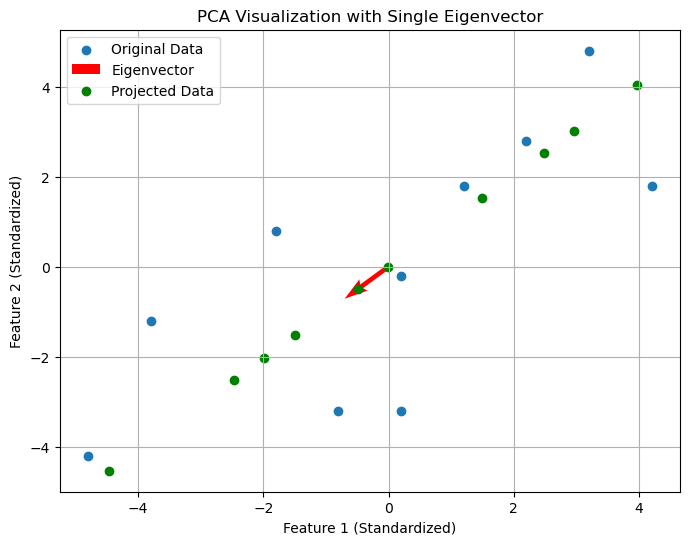

In [7]:
# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(data_standardized[0], data_standardized[1], label='Original Data')
plt.quiver(0, 0, selected_eigenvector[0], selected_eigenvector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector')
plt.scatter(projected_data * selected_eigenvector[0], projected_data * selected_eigenvector[1], color='g', label='Projected Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('PCA Visualization with Single Eigenvector')
plt.legend()
plt.grid(True)
plt.show()

## PCA áp dụng cho bộ dữ liệu phân lớp các loại rượu vang:

> Link dataset: https://www.kaggle.com/datasets/brynja/wineuci

**Ý nghĩa của từng cột trong bộ dữ liệu:**
- `0`: Label - nhãn biểu thị loại rượu cụ thể nào đó
    - Class 1 - 59 dòng
    - Class 2 - 71 dòng
    - Class 3 - 48 dòng
- `1`: Alcohol
- `2`: Malic acid
- `3`: Ash
- `4`: Alcalinity of ash
- `5`: Magnesium
- `6`: Total phenols
- `7`: Flavanoids
- `8`: Nonflavanoid phenols
- `9`: Proanthocyanins
- `10`: Color intensity
- `11`: Hue
- `12`: OD280/OD315 of diluted wines
- `13`: Proline

In [8]:
df = pd.read_csv("./Wine.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
# Step 1: Standardize the data
data_standardized = (df - df.mean()) 
data_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.938202,1.229382,-0.626348,0.063483,-3.894944,27.258427,0.504888,1.03073,-0.081854,0.699101,0.58191,0.082551,1.308315,318.106742
1,-0.938202,0.199382,-0.556348,-0.226517,-8.294944,0.258427,0.354888,0.73073,-0.101854,-0.310899,-0.67809,0.092551,0.788315,303.106742
2,-0.938202,0.159382,0.023652,0.303483,-0.894944,1.258427,0.504888,1.21073,-0.061854,1.219101,0.62191,0.072551,0.558315,438.106742
3,-0.938202,1.369382,-0.386348,0.133483,-2.694944,13.258427,1.554888,1.46073,-0.121854,0.589101,2.74191,-0.097449,0.838315,733.106742
4,-0.938202,0.239382,0.253652,0.503483,1.505056,18.258427,0.504888,0.66073,0.028146,0.229101,-0.73809,0.082551,0.318315,-11.893258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.061798,0.709382,3.313652,0.083483,1.005056,-4.741573,-0.615112,-1.41927,0.158146,-0.530899,2.64191,-0.317449,-0.871685,-6.893258
174,1.061798,0.399382,1.573652,0.113483,3.505056,2.258427,-0.495112,-1.27927,0.068146,-0.180899,2.24191,-0.257449,-1.051685,3.106742
175,1.061798,0.269382,1.943652,-0.106517,0.505056,20.258427,-0.705112,-1.33927,0.068146,-0.240899,5.14191,-0.367449,-1.051685,88.106742
176,1.061798,0.169382,0.253652,0.003483,0.505056,20.258427,-0.645112,-1.34927,0.168146,-0.130899,4.24191,-0.357449,-0.991685,93.106742


In [10]:
# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(data_standardized, rowvar=False)
cov_matrix

array([[ 6.00679236e-01, -2.06515267e-01,  3.79038596e-01,
        -1.05554498e-02,  1.34036374e+00, -2.31549546e+00,
        -3.48834825e-01, -6.56090586e-01,  4.71773630e-02,
        -2.21413064e-01,  4.77338914e-01, -1.09367549e-01,
        -4.33737066e-01, -1.54667651e+02],
       [-2.06515267e-01,  6.59062328e-01,  8.56113090e-02,
         4.71151590e-02, -8.41092903e-01,  3.13987812e+00,
         1.46887218e-01,  1.92033222e-01, -1.57542595e-02,
         6.35175205e-02,  1.02828254e+00, -1.33134432e-02,
         4.16978226e-02,  1.64567185e+02],
       [ 3.79038596e-01,  8.56113090e-02,  1.24801540e+00,
         5.02770393e-02,  1.07633171e+00, -8.70779534e-01,
        -2.34337723e-01, -4.58630366e-01,  4.07333619e-02,
        -1.41146982e-01,  6.44838183e-01, -1.43325638e-01,
        -2.92447483e-01, -6.75488666e+01],
       [-1.05554498e-02,  4.71151590e-02,  5.02770393e-02,
         7.52646353e-02,  4.06208278e-01,  1.12293658e+00,
         2.21455913e-02,  3.15347299e-02,  6.

In [11]:
# Step 3: Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([9.92020307e+04, 1.72536596e+02, 9.53119601e+00, 5.10080996e+00,
        1.28578826e+00, 8.68166571e-01, 2.87006972e-01, 1.55278963e-01,
        1.13733317e-01, 8.63784262e-02, 4.62026188e-02, 3.49273038e-02,
        8.09265892e-03, 2.07626732e-02]),
 array([[-1.55934284e-03,  2.77861762e-03,  1.00919962e-01,
          1.47645845e-01, -2.19197410e-01, -1.68685378e-01,
          1.78800746e-01, -1.90995227e-01,  1.65827952e-01,
         -5.10993277e-01, -6.23529116e-01, -3.66354279e-01,
         -4.71580781e-02, -9.59876464e-02],
        [ 1.65926191e-03,  1.20426744e-03,  1.83035443e-02,
          1.36988601e-01,  4.89326076e-02,  2.02080449e-01,
         -8.90116287e-01, -3.49028029e-01,  1.04297167e-01,
         -5.75902207e-02, -8.90749178e-02, -3.47767055e-02,
         -1.34219856e-02,  4.24032585e-03],
        [-6.81019030e-04,  2.15953126e-03,  1.24559463e-01,
          1.56739376e-01, -5.28930958e-01,  8.03839930e-01,
          1.46858065e-01,  7.55207359e-02,  1.02255162

In [12]:
# Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [13]:
# Step 5: Choose the top k eigenvectors
k = 2  # Choose the number of components
projection_matrix = sorted_eigenvectors[:, :k]
projection_matrix

array([[-1.55934284e-03,  2.77861762e-03],
       [ 1.65926191e-03,  1.20426744e-03],
       [-6.81019030e-04,  2.15953126e-03],
       [ 1.94905197e-04,  4.59399561e-03],
       [-4.67130461e-03,  2.64607000e-02],
       [ 1.78679787e-02,  9.99339902e-01],
       [ 9.89831553e-04,  8.74730944e-04],
       [ 1.56729290e-03, -5.86582556e-05],
       [-1.23086954e-04, -1.35399415e-03],
       [ 6.00609082e-04,  5.00222716e-03],
       [ 2.32712720e-03,  1.51142222e-02],
       [ 1.71381131e-04, -7.64042527e-04],
       [ 7.04935892e-04, -3.50068415e-03],
       [ 9.99821721e-01, -1.77693551e-02]])

In [14]:
# Step 6: Project the original data onto the new feature subspace
data_pca = np.dot(data_standardized, projection_matrix)
data_pca

array([[ 3.18564055e+02,  2.14907729e+01],
       [ 3.03098514e+02, -5.36608268e+00],
       [ 4.38062063e+02, -6.53798613e+00],
       [ 7.33240711e+02,  1.93319951e-01],
       [-1.15699516e+01,  1.84872549e+01],
       [ 7.03231800e+02, -3.31723191e-01],
       [ 5.42972384e+02, -1.35191971e+01],
       [ 5.48402656e+02,  1.14491475e+01],
       [ 2.98037964e+02, -8.18149185e+00],
       [ 2.98050654e+02, -7.10283985e+00],
       [ 7.63080247e+02, -8.33356923e+00],
       [ 5.32944043e+02, -1.42878810e+01],
       [ 5.72835177e+02, -2.10050612e+01],
       [ 4.02926332e+02, -1.61035066e+01],
       [ 8.00053884e+02, -1.21175637e+01],
       [ 5.63246356e+02,  2.21467383e+00],
       [ 5.33380465e+02,  1.08044932e+01],
       [ 3.83318588e+02,  8.47646622e+00],
       [ 9.33118716e+02, -8.35296527e+00],
       [ 9.84045208e+01,  1.43903679e+01],
       [ 3.35950160e+01,  2.55653372e+01],
       [ 2.31478724e+01,  1.81494036e+00],
       [ 2.88094143e+02, -3.96443421e+00],
       [ 2.

In [15]:
print("PCA Projection Matrix:")
print(projection_matrix)
print("\nProjected Data:")
print(data_pca)

PCA Projection Matrix:
[[-1.55934284e-03  2.77861762e-03]
 [ 1.65926191e-03  1.20426744e-03]
 [-6.81019030e-04  2.15953126e-03]
 [ 1.94905197e-04  4.59399561e-03]
 [-4.67130461e-03  2.64607000e-02]
 [ 1.78679787e-02  9.99339902e-01]
 [ 9.89831553e-04  8.74730944e-04]
 [ 1.56729290e-03 -5.86582556e-05]
 [-1.23086954e-04 -1.35399415e-03]
 [ 6.00609082e-04  5.00222716e-03]
 [ 2.32712720e-03  1.51142222e-02]
 [ 1.71381131e-04 -7.64042527e-04]
 [ 7.04935892e-04 -3.50068415e-03]
 [ 9.99821721e-01 -1.77693551e-02]]

Projected Data:
[[ 3.18564055e+02  2.14907729e+01]
 [ 3.03098514e+02 -5.36608268e+00]
 [ 4.38062063e+02 -6.53798613e+00]
 [ 7.33240711e+02  1.93319951e-01]
 [-1.15699516e+01  1.84872549e+01]
 [ 7.03231800e+02 -3.31723191e-01]
 [ 5.42972384e+02 -1.35191971e+01]
 [ 5.48402656e+02  1.14491475e+01]
 [ 2.98037964e+02 -8.18149185e+00]
 [ 2.98050654e+02 -7.10283985e+00]
 [ 7.63080247e+02 -8.33356923e+00]
 [ 5.32944043e+02 -1.42878810e+01]
 [ 5.72835177e+02 -2.10050612e+01]
 [ 4.02926332e

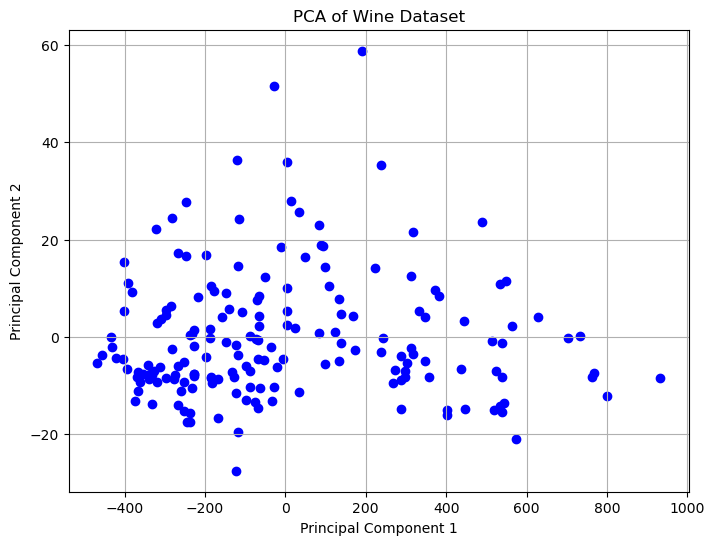

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='b', marker='o')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()